# Inputs: 
Sales_in_thousands
1.fuel_efficency
2.price_in_thousand

Outputs:
- vehicle_type (1: customer purchased commercial vehicle, 0: Customer purchase non-commercial vehicle)

In [1]:
## STEP #0: LIBRARIES IMPORt

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##step #1:imprt datset1

In [59]:
# read the data using pandas dataframe
training_set = pd.read_csv('Car_sales.csv')
training_set

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,26.000,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25,04-04-2011,83.998724


In [62]:
# Show the data head!
training_set.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,26.00,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.777639


In [63]:
# Show the data head!
training_set.tail()


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23,4/26/2011,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24,11/14/2011,85.735655


In [7]:
# STEP #2: EXPLORE/VISUALIZE DATASET

In [8]:
Commercial = training_set[training_set['Vehicle_type']=='Passenger']
NonCommercial = training_set[training_set['Vehicle_type']=='Car']

In [9]:
Commercial

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,26.000,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25,04-04-2011,83.998724


In [10]:
NonCommercial

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
18,Cadillac,Escalade,14.785,NaN,Car,46.225,5.7,255.0,117.5,77.0,201.2,5.572,30.0,15,4/17/2012,109.509117
33,Chrysler,Town & Country,53.480,19.540,Car,22.120,NaN,NaN,NaN,NaN,NaN,NaN,18.0,22,7/13/2011,NaN
40,Dodge,Ram Pickup,227.061,15.060,Car,19.460,5.2,230.0,138.7,79.3,224.2,4.470,26.0,17,03-06-2012,90.211700
41,Dodge,Ram Wagon,16.767,15.510,Car,21.315,3.9,175.0,109.6,78.8,192.6,4.245,32.0,15,01-06-2012,71.135292
42,Dodge,Ram Van,31.038,13.425,Car,18.575,3.9,175.0,127.2,78.8,208.5,4.298,32.0,16,7/26/2012,70.078322
43,Dodge,Dakota,111.313,11.260,Car,16.980,2.5,120.0,131.0,71.5,215.0,3.557,22.0,19,11/25/2011,49.645002
44,Dodge,Durango,101.323,NaN,Car,26.310,5.2,230.0,115.7,71.7,193.5,4.394,25.0,17,6/27/2012,92.854125
45,Dodge,Caravan,181.749,12.025,Car,19.565,2.4,150.0,113.3,76.8,186.3,3.533,20.0,24,09-01-2011,61.227000
52,Ford,Explorer,276.747,16.640,Car,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19,4/25/2012,87.635496
53,Ford,Windstar,155.787,13.175,Car,21.410,3.0,150.0,120.7,76.6,200.9,3.761,26.0,21,2/25/2012,62.095048


In [11]:
print("Total =", len(training_set))

print("Number of customers who purchased commercial vehicle =", len(Commercial))
print("Percentage of commercial vehicle =", 1.*len(Commercial)/len(training_set)*100.0, "%")
 
print("Number of customers who purchased Noncommercial vehicle =", len(NonCommercial))
print("Percentage of non commercial vehicle =", 1.*len(NonCommercial)/len(training_set)*100.0, "%")
 

Total = 157
Number of customers who purchased commercial vehicle = 116
Percentage of commercial vehicle = 73.88535031847134 %
Number of customers who purchased Noncommercial vehicle = 41
Percentage of non commercial vehicle = 26.11464968152866 %


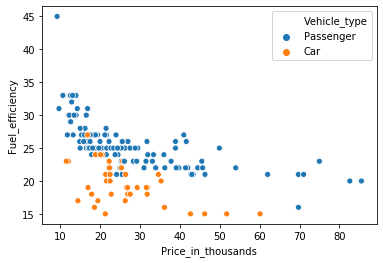

In [12]:
sns.scatterplot(training_set['Price_in_thousands'], training_set['Fuel_efficiency'], hue = training_set['Vehicle_type'])

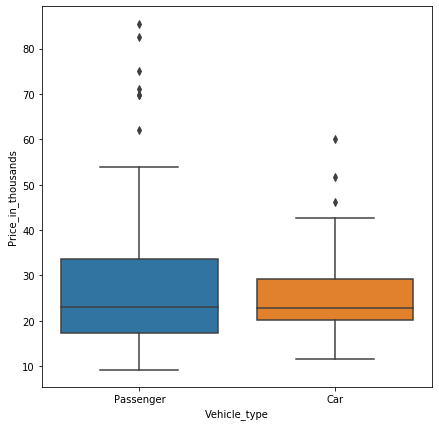

In [13]:
plt.figure(figsize=(7, 7))
sns.boxplot(x='Vehicle_type', y='Price_in_thousands',data=training_set)

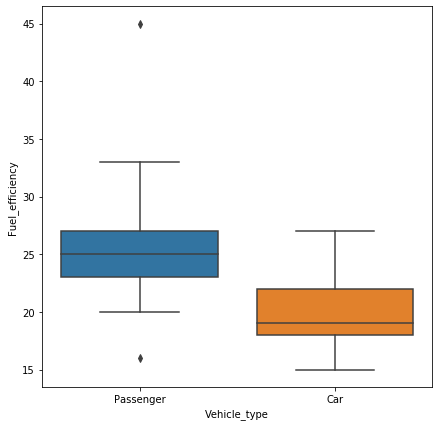

In [14]:
plt.figure(figsize=(7, 7))
sns.boxplot(x='Vehicle_type', y='Fuel_efficiency',data=training_set)

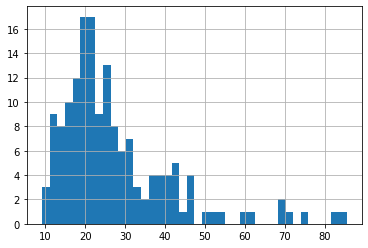

In [15]:
training_set['Price_in_thousands'].hist(bins = 40)

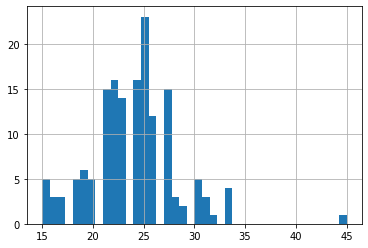

In [16]:
training_set['Fuel_efficiency'].hist(bins = 40)

In [17]:
# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

In [18]:
training_set1=training_set.replace(to_replace =["Car","Passenger"],
value =["0","1"])


In [19]:
training_set1

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,1,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,1,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,1,26.000,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26,01-04-2012,NaN
3,Acura,RL,8.588,29.725,1,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,1,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.777639
5,Audi,A6,18.780,23.555,1,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.565105
6,Audi,A8,1.380,39.000,1,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,1,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,1,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,1,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25,04-04-2011,83.998724


In [20]:
training_set1.drop(['Power_perf_factor', 'Manufacturer', 'Latest_Launch','Model', 'Sales_in_thousands', '__year_resale_value','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity'],axis=1,inplace=True)

In [21]:
training_set1

,Vehicle_type,Price_in_thousands,Fuel_efficiency
0,1,21.500,28
1,1,28.400,25
2,1,26.000,26
3,1,42.000,22
4,1,23.990,27
5,1,33.950,22
6,1,62.000,21
7,1,26.990,26
8,1,33.400,24
9,1,38.900,25


In [22]:
#Let's drop the target coloumn before we do train test split
X = training_set1.drop('Vehicle_type',axis=1).values
y = training_set1['Vehicle_type'].values

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


# Linear regression

In [69]:
temp=training_set1['Price_in_thousands']

In [70]:
X=pd.DataFrame(temp)

In [71]:
temp1=training_set1['Fuel_efficiency']

In [72]:
y=pd.DataFrame(temp1)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [74]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
y_pred = regressor.predict(X_test)

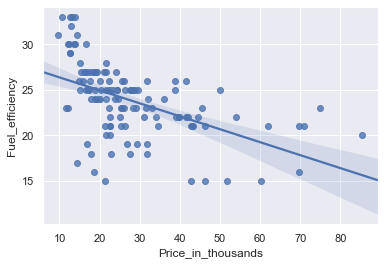

In [84]:
import seaborn as sns
sns.set(color_codes=True)

dataframe_training = pd.DataFrame()
dataframe_training['Price_in_thousands'] = X_train['Price_in_thousands']
dataframe_training['Fuel_efficiency'] = y_train
ax = sns.regplot(x="Price_in_thousands", y="Fuel_efficiency", data= dataframe_training)

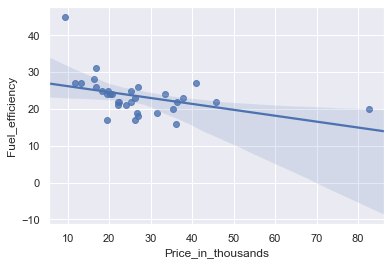

In [85]:
dataframe_test = pd.DataFrame()
dataframe_test['Price_in_thousands'] = X_test['Price_in_thousands']
dataframe_test['Fuel_efficiency'] = y_test
ax = sns.regplot(x="Price_in_thousands", y="Fuel_efficiency", data= dataframe_test)

In [76]:
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
print("Variance score: {}".format(r2_score(y_test, y_pred)))

Coefficients: 
 [[-0.14244406]]
Intercept: 
 [27.7974544]
Mean squared error: 22.599745068037798
Variance score: 0.1551497170826991


In [77]:
import statsmodels.api as sm


x = sm.add_constant(X)

results = sm.OLS(endog = y, exog=x).fit()

results.summary()

C:\pp\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Fuel_efficiency   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     48.29
Date:                Tue, 05 May 2020   Prob (F-statistic):           9.59e-11
Time:                        16:41:44   Log-Likelihood:                -428.24
No. Observations:                 157   AIC:                             860.5
Df Residuals:                     155   BIC:                             866.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 27.7756      0.644     43.102      0.000      26.503      29.049
Price_in_thousands    -0.1453      0.021     -6.949      0.000      -0.187      -0.104
==============================================================================
Omnibus:                       22.471   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.481
Skew:                           0.424   Prob(JB):                     2.47e-17
Kurtosis:                       6.313   Cond. No.                         66.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# polynomial Regression

In [89]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1) 

In [90]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 4) #try 2,3 and 4
X_polynomial = polynomial_regressor.fit_transform(X)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_polynomial, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
y_poly_pred = linear_regressor_2.predict(X_polynomial)

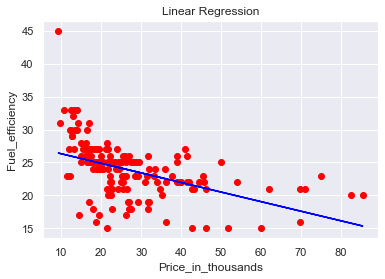

In [96]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Price_in_thousands')
plt.ylabel('Fuel_efficiency')
plt.show()


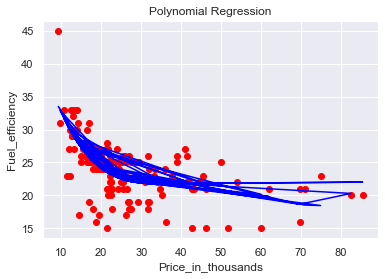

In [97]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor_2.predict(polynomial_regressor.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Price_in_thousands')
plt.ylabel('Fuel_efficiency')
plt.show()

In [98]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("Root Mean Square Error:", rmse)
print("R2 Score:", r2)

Root Mean Square Error: 3.2034824801253485
R2 Score: 0.4288372131567013


# Logistic Regression

In [43]:
X = training_set1.iloc[:, [1, 2]].values
y = training_set1.iloc[:, 0].values

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [46]:
X_train

array([[-0.59479937,  0.75433049],
       [-0.6383985 ,  0.75433049],
       [-0.58375894,  0.04658216],
       [-0.33355619, -0.66116617],
       [ 1.32743003, -2.07666283],
       [-1.24112131,  1.69799493],
       [-0.35887181,  0.51841438],
       [-0.51744607,  0.51841438],
       [-0.09481579, -0.18933395],
       [-0.09481579,  0.51841438],
       [ 0.8123274 ,  0.51841438],
       [-0.72911282, -1.13299839],
       [ 0.10208351,  0.28249827],
       [-0.37785853,  0.28249827],
       [-0.33904124, -0.89708228],
       [-1.04169045,  2.16982715],
       [-0.27765085,  0.28249827],
       [ 1.71440748, -2.07666283],
       [-0.12681193,  0.51841438],
       [-0.73558236,  0.75433049],
       [ 0.01488525, -1.3689145 ],
       [-0.4893176 ,  0.28249827],
       [-0.13349244, -0.66116617],
       [-0.59866703,  0.75433049],
       [ 3.3488123 , -0.18933395],
       [-0.40352576,  0.75433049],
       [-1.00139642,  2.16982715],
       [-1.05716111,  1.46207882],
       [ 2.97821969,

In [47]:
y_train

array(['1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1',
       '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1',
       '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1',
       '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1',
       '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1',
       '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1'],
      dtype=object)

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\pp\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
y_proba = classifier.predict_proba(X_train)
y_proba

array([[0.04981067, 0.95018933],
       [0.05275364, 0.94724636],
       [0.26854581, 0.73145419],
       [0.64851142, 0.35148858],
       [0.90299091, 0.09700909],
       [0.00931162, 0.99068838],
       [0.06774012, 0.93225988],
       [0.08303039, 0.91696961],
       [0.26373548, 0.73626452],
       [0.04795343, 0.95204657],
       [0.01410119, 0.98589881],
       [0.9219595 , 0.0780405 ],
       [0.0686431 , 0.9313569 ],
       [0.12546448, 0.87453552],
       [0.78143149, 0.21856851],
       [0.00192341, 0.99807659],
       [0.11098333, 0.88901667],
       [0.84473242, 0.15526758],
       [0.0500218 , 0.9499782 ],
       [0.05991424, 0.94008576],
       [0.88999447, 0.11000553],
       [0.14344215, 0.85655785],
       [0.58294113, 0.41705887],
       [0.05006532, 0.94993468],
       [0.00300153, 0.99699847],
       [0.03864683, 0.96135317],
       [0.001819  , 0.998181  ],
       [0.01380915, 0.98619085],
       [0.01827999, 0.98172001],
       [0.22082205, 0.77917795],
       [0.

In [50]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array(['1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1',
       '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1'],
      dtype=object)

In [51]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array(['1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1',
       '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1',
       '1'], dtype=object)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)

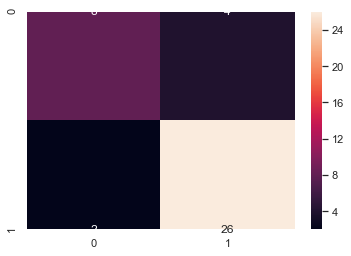

In [53]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [54]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))

Accuracy: 0.85


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.87      0.93      0.90        28

   micro avg       0.85      0.85      0.85        40
   macro avg       0.83      0.80      0.81        40
weighted avg       0.85      0.85      0.85        40



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


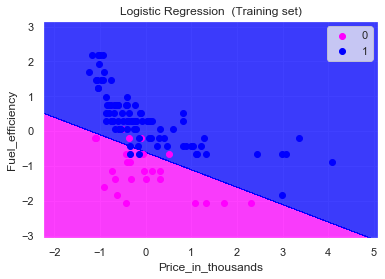

In [56]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Logistic Regression  (Training set)')
plt.xlabel('Price_in_thousands')
plt.ylabel('Fuel_efficiency')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


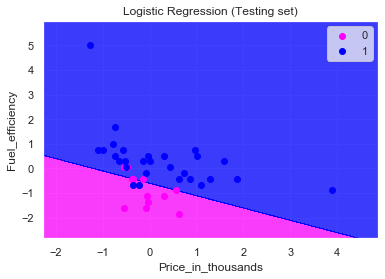

In [57]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Logistic Regression (Testing set)')
plt.xlabel('Price_in_thousands')
plt.ylabel('Fuel_efficiency')
plt.legend()
plt.show()